In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os
import requests

# 50 Startup Dataset üìä

This dataset contains information about 50 startups, including their R&D spend, administration spend, marketing spend, state, and profit. It is a great dataset for practicing machine learning techniques such as regression and classification.

This is the reference page on Kaggle
https://www.kaggle.com/datasets/amineoumous/50-startups-data

In [2]:
path = './50_Startups.csv'
startup_df = pd.read_csv(path)

## A Guided EDA Process üöÄüîç

Exploratory Data Analysis (EDA) is an essential step in any data science project, helping us understand, clean, and gain insights from our dataset. Here's a structured EDA process to guide your data exploration:

1. **Understand Column Meanings:** Begin by comprehending the meaning of each column in your dataset. Know what each attribute represents and its significance in your analysis. This provides context for your data.

2. **Check Data Integrity:** Ensure the integrity of your dataset by inspecting for missing values (NaNs) and outliers. Addressing data quality issues is crucial to reliable analysis.

3. **Visualize Distributions:** Utilize data visualization techniques to explore the distribution of individual variables. Tools like histograms, kernel density plots, and box plots can reveal insights into the data's spread and central tendencies.

4. **Pair Plots for Relationships:** Create pair plots to visualize relationships between pairs of variables. This matrix of scatter plots helps identify correlations and patterns, aiding in understanding the data's structure.

## Understand Column Meanings üìä

In [3]:
startup_df.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

### Dataset Description üìó

Here is a more detailed explanation of each feature:

1. R&D spend: The amount of money spent on research and development. üöÄ
2. Administration spend: The amount of money spent on administrative tasks such as accounting and HR. üè¢
3. Marketing spend: The amount of money spent on marketing activities such as advertising and public relations. üì£
4. State: The state in which the startup is located. üá∫üá∏
5. Profit: The amount of money that the startup has made. üí∞

This dataset can be used to answer a variety of questions about startups, such as:

1. What are the most important factors that influence startup profit?

2. Can we predict which startups are likely to be successful?

3. How can startups allocate their resources most effectively?


## Check Data Integrity üîç

In [4]:
# Check for missing values
missing_values = startup_df.isnull().sum()

# Display the count of missing values for each column
print("Missing Values Summary:")
print(missing_values)

Missing Values Summary:
R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


We are good to go! No missing values.

## Visualize Distributions üìà

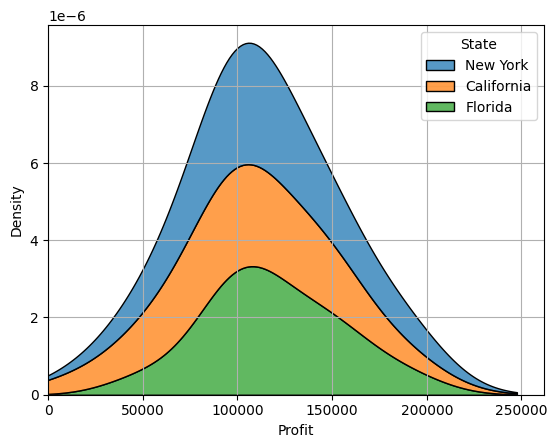

In [5]:
# Select the column you want to analyze
column_to_analyze = 'Profit'

ax = sns.kdeplot(startup_df, x = column_to_analyze, hue='State', multiple='stack')
ax.set_xlim(0,None)
ax.grid()

## Understanding the Order of Magnitude with Log Scale
In data analysis and visualization, understanding the order of magnitude of values is crucial for making meaningful observations and comparisons. When dealing with a dataset like the one featuring 50 startups, each operating in different states with varying profit margins, gaining insights into the order of magnitude of profits can be a game-changer.

### What Is a Log Scale? üìä
A logarithmic scale, often referred to as a "log scale," is a powerful tool that represents data values on a non-linear axis. Instead of having evenly spaced intervals, a log scale divides the axis into orders of magnitude, typically in powers of 10. This type of scaling allows us to visualize data spanning a wide range of values more effectively.

### Why Use a Log Scale in Our Startup Analysis? üíº
#### Handling Profits Across States: üí∞

In the case of our startup dataset, we're dealing with profits from various states, each potentially having vastly different income levels. For example, profit in California could be significantly higher than in smaller states. Using a linear scale may make it challenging to discern meaningful differences.

#### Spotting Profit Patterns: üìà

A log scale helps us emphasize relative changes in profit values rather than just absolute differences. It's ideal for highlighting variations and patterns in the order of magnitude of profits among different states.

#### Visualizing Growth Potential: üöÄ

Startups often aim for exponential growth. If we were handiling a **time series**, log scale is particularly useful for visualizing data that exhibits exponential growth or decay, helping us identify which states show signs of rapid profit expansion and which might need more attention.





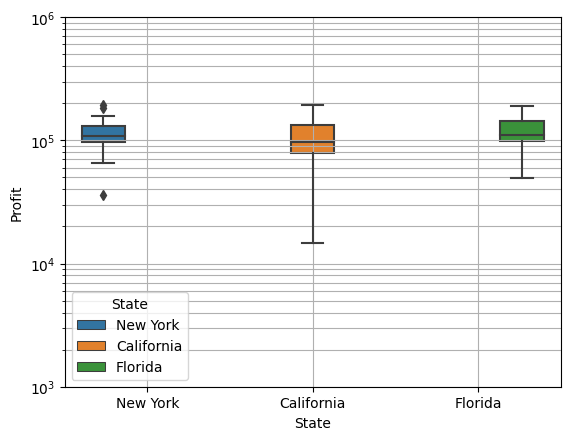

In [6]:
# Select the column you want to analyze (replace 'Per Capita' with the actual column name)
column_to_analyze = 'Profit'

ax = sns.boxplot(startup_df, x = 'State', y = column_to_analyze, hue='State')

ax.set_yscale('log')
ax.set_ylim(1e3, 1e6)
ax.grid(which='both')

## Pairplots for Relationships üîÑ

Pairplots, also known as pairwise scatter plots or scatterplot matrices, are important in Exploratory Data Analysis (EDA) for several reasons:

1. **Visualization of Relationships**: Pairplots allow you to visualize the relationships between pairs of variables in your dataset. By plotting each pair of variables against each other, you can quickly identify patterns, trends, and potential correlations. This visual inspection can reveal both linear and non-linear relationships between variables.

2. **Identifying Outliers**: Pairplots can help in identifying outliers or anomalies in the data. Outliers may appear as data points that fall far from the main cluster of points in the scatterplots. Identifying outliers is crucial because they can significantly impact statistical analyses and machine learning models.

3. **Multivariate Analysis**: EDA often involves examining the interactions between multiple variables simultaneously. Pairplots provide a comprehensive view of these interactions, making it easier to assess how different variables relate to one another in a multivariate context.

4. **Feature Selection**: When dealing with a large number of features (variables), pairplots can aid in feature selection. You can use them to visually identify which pairs of variables show strong relationships or dependencies, which may guide you in selecting a subset of the most relevant features for further analysis or modeling.

5. **Diagnosing Collinearity**: Collinearity is a situation where two or more variables in your dataset are highly correlated with each other. Pairplots can help you diagnose collinearity by showing if there are strong linear relationships between pairs of variables. Identifying collinearity is important because it can lead to instability in regression models and make it challenging to interpret the importance of individual predictors.

6. **Data Quality Assessment**: Pairplots can reveal data quality issues such as missing values or data entry errors. If you see unusual patterns or gaps in the scatterplots, it may indicate problems with the data that need to be addressed.

7. **Hypothesis Generation**: Pairplots can serve as a starting point for generating hypotheses about your data. When you observe interesting patterns or relationships in the pairplots, you can formulate hypotheses to be tested in subsequent analyses.

8. **Communication**: Pairplots are a useful tool for communicating insights about your data to others, including team members, stakeholders, or non-technical audiences. Visualizations often make it easier for people to grasp complex relationships in the data.

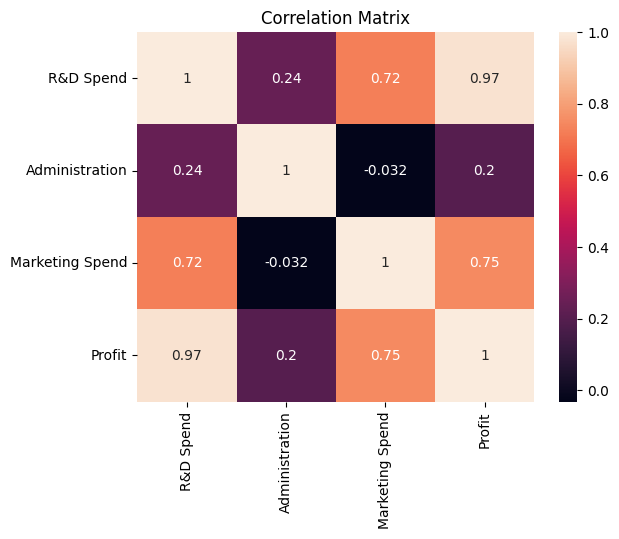

In [7]:
# heatmap

fig, ax = plt.subplots()

ax = sns.heatmap(startup_df.corr(numeric_only=True), annot=True)
ax.set_title('Correlation Matrix')

fig.show()

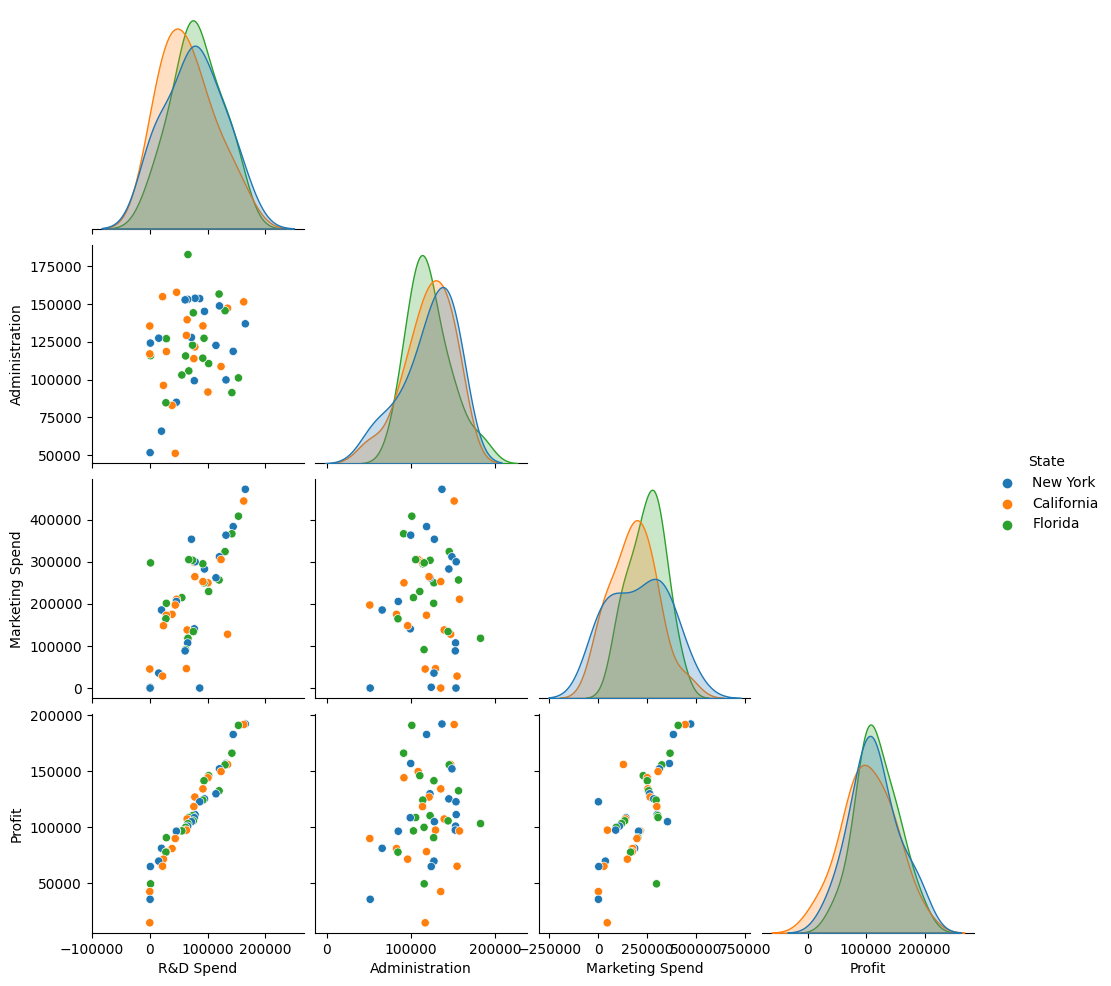

In [8]:
# pairplot

sns.pairplot(startup_df, hue='State', corner=True)

## Questions:
 1. Are there any dependencies with the State?
 2. If the goal is to predict the Profit as function of Administration, Marketing Spend and R&D Spend, what is the most important of these variables?


# Preprocessing ‚öôÔ∏è

Preprocessing is the process of preparing raw data for machine learning. It is an essential step in any machine learning project, as it can help to improve the performance and accuracy of your model.

The goal of preprocessing is to transform the raw data into a format that is more suitable for machine learning algorithms. This may involve cleaning the data, handling missing values, encoding categorical features, and scaling numerical features.

## Preprocessing with Scikit Learn üìòüìô

Scikit-learn is a popular Python library for machine learning. It provides a variety of preprocessing tools that can be used to prepare data for machine learning.

1. **Cleaning the data**: This may involve removing outliers, correcting errors, and filling in missing values.
2. **Handling missing values**: There are a number of ways to handle missing values, such as dropping the samples with missing values, imputing the missing values with a mean or median value, or using a more sophisticated imputation method such as k-nearest neighbors.
3. **Encoding categorical features**: Categorical features, such as text or country names, need to be encoded into numerical values before they can be used by machine learning algorithms. Scikit-learn provides a number of encoders for categorical features, such as LabelEncoder and OneHotEncoder.
4. **Scaling numerical features**: Numerical features should be scaled so that they have a similar range of values. This helps to prevent any one feature from dominating the model. Scikit-learn provides a number of scalers for numerical features, such as StandardScaler and MinMaxScaler.


Once you have preprocessed your data, it is ready to be used to train a machine learning model. Scikit-learn provides a variety of machine learning algorithms, such as linear regression, support vector machines, and random forests.



## Encoding Categorical Variables for Machine Learning ü§ñ

Categorical variables are variables that have a finite set of possible values. For example, the categorical variable "color" might have the values "red", "green", and "blue".

Machine learning algorithms typically require numerical input variables. This means that categorical variables need to be encoded into numerical values before they can be used to train a machine learning model.

There are two main ways to encode categorical variables:

Label encoding: This involves assigning each category a unique integer value. For example, in the "color" example above, we could assign the integer value 1 to the category "red", the integer value 2 to the category "green", and the integer value 3 to the category "blue".
One-hot encoding: This involves creating a new binary variable for each category. For example, in the "color" example above, we would create three new binary variables: one for the category "red", one for the category "green", and one for the category "blue". Each binary variable would take on the value 1 if the sample belongs to the corresponding category, and the value 0 otherwise.

`LabelEncoding` imposes a hierarchy on the dataset and should be treated when the category has some kind of hierarchy (e.g. Danger Low, Danger Medium and Danger High can be mapped into 0, 1, 2).
In our case the categorical variable is `State`.

In [9]:
from sklearn.preprocessing import OneHotEncoder

print("Before")
print(startup_df['State'][:5])
# One Hot Encoder
encoder = OneHotEncoder()
col_out = encoder.fit_transform(startup_df[['State']])

print("After")
print(col_out[:5])

Before
0      New York
1    California
2       Florida
3      New York
4       Florida
Name: State, dtype: object
After
  (0, 2)	1.0
  (1, 0)	1.0
  (2, 1)	1.0
  (3, 2)	1.0
  (4, 1)	1.0


... or you can use the Pandas function `get_dummies` for **One-Hot Encoding**.

It is a technique used to transform categorical data into a binary vector representation. Each unique category in the categorical feature is converted into a new binary feature (0 or 1), and only one of these binary features is "hot" (1) for each data point, indicating the presence of a specific category. Here's how One-Hot Encoding works:

1. Identify the unique categories in the categorical feature.
2. Create a binary feature (dummy variable) for each category.
3. For each data point, set the binary feature corresponding to the category it belongs to as 1 and all other binary features as 0.
4. Replace the original categorical feature with the set of binary features.

One-Hot Encoding is especially suitable for nominal data with no inherent order because it doesn't introduce any artificial relationships between categories. However, it can lead to a large number of features (curse of dimensionality) if there are many unique categories, which can be problematic for some machine learning algorithms. In such cases, techniques like feature selection or dimensionality reduction may be applied.

In [10]:
pd.get_dummies(startup_df, columns=['State']).head()

R&D Spend  Administration  Marketing Spend     Profit  State_California  \
0  165349.20       136897.80        471784.10  192261.83                 0   
1  162597.70       151377.59        443898.53  191792.06                 1   
2  153441.51       101145.55        407934.54  191050.39                 0   
3  144372.41       118671.85        383199.62  182901.99                 0   
4  142107.34        91391.77        366168.42  166187.94                 0   

   State_Florida  State_New York  
0              0               1  
1              0               0  
2              1               0  
3              0               1  
4              1               0

## Standard Scaler for Machine Learning üìä

The standard scaler is a machine learning preprocessing technique that transforms data so that each feature has a mean of 0 and a standard deviation of 1. This is important because it helps to prevent any one feature from dominating the model.

**Percentile Interpretation**. Approximately **68%** of the data points in a dataset with a standard deviation of 1 will fall within one standard deviation of the mean (i.e., within one unit above or below the mean).

For example, if one feature has a much larger range of values than the other features, the model may learn to focus on that feature and ignore the other features.

The standard scaler is a simple and effective way to scale numerical data. It is also very computationally efficient, making it ideal for large datasets.

In [21]:
from sklearn.preprocessing import StandardScaler

print("Original:")
print(startup_df.head(5))

X = startup_df.drop(['Profit', 'State'], axis=1)
print("\nBefore:")
print(X.head(5))

# Scale the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

print()
print("After:")
print(X[:5, :])  # Displaying the first 5 rows (axis 0) and all columns (axis 1) of the numpy.ndarray

Original:
   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

Before:
   R&D Spend  Administration  Marketing Spend
0  165349.20       136897.80        471784.10
1  162597.70       151377.59        443898.53
2  153441.51       101145.55        407934.54
3  144372.41       118671.85        383199.62
4  142107.34        91391.77        366168.42

After:
[[ 2.01641149  0.56075291  2.15394309]
 [ 1.95586034  1.08280658  1.9236004 ]
 [ 1.75436374 -0.72825703  1.62652767]
 [ 1.55478369 -0.09636463  1.42221024]
 [ 1.5049372  -1.07991935  1.28152771]]


## Splitting the Dataset into Train and Test Set üî™

Splitting the dataset into a train and test set is an important step in machine learning. The train set is used to train the model, and the test set is used to evaluate the performance of the trained model on unseen data.

This is important because it helps to prevent overfitting. Overfitting occurs when a model learns the training data too well and is unable to generalize to new data.

A common split ratio is 80/20, meaning that 80% of the data is used for the train set and 20% of the data is used for the test set.

Here is an example of how to split the dataset into a train and test set using scikit-learn:



In [12]:
from sklearn.model_selection import train_test_split

# startup_df.drop('Profit', axis=1) returns the dataset without the column 'Profit' (because we want to predict that column)
X = startup_df.drop('Profit', axis=1)
y = startup_df['Profit']
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Putting all together ü§≤

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# One-hot encode the categorical variable "State"
startup_df_dummies = pd.get_dummies(startup_df, columns=['State'])

X = startup_df_dummies.drop('Profit', axis=1)
y = startup_df['Profit']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler_X = StandardScaler()
scaler_X.fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

# Standardize the data
## First make sure to pass the data in the right data type: StandarScaler expects 2D data:
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

## Then procede as before
scaler_y = StandardScaler()
scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test = scaler_y.transform(y_test)

print(X_train[:5])
print(y_train[:5])

[[ 0.34202149  0.22787678  0.12425038 -0.69388867  1.36277029 -0.69388867]
 [ 1.36207849 -1.0974737   1.14990688 -0.69388867  1.36277029 -0.69388867]
 [-0.71081297 -2.5770186  -0.34136825  1.44115338 -0.73379939 -0.69388867]
 [ 0.90611438  1.0172367   0.66890185 -0.69388867 -0.73379939  1.44115338]
 [ 1.40997088 -0.09115403  1.30006861 -0.69388867 -0.73379939  1.44115338]]
[[ 0.62505458]
 [ 1.21802035]
 [-0.61948176]
 [ 0.8811677 ]
 [ 1.62086118]]


# Linear Regression üìà
Linear Regression (LR) is a fundamental and versatile machine learning method used for various tasks in the world of data science and statistics. At its core, LR is all about finding a linear relationship between one or more independent variables (features) and a dependent variable (target). üßÆ

## When to Use Linear Regression?
Linear Regression is a go-to choice when you want to:

1. Predict a Continuous Target: LR is primarily used for predicting continuous numeric values, making it suitable for problems like predicting stock prices, house prices, or exam scores. üìä
2. Understand Relationships: It helps you understand the relationships between variables. LR can reveal how one or more features influence the target variable and the direction and strength of those influences. üîç
3. Assumptions: However, it's important to note that LR relies on certain assumptions, including linearity, independence of errors, and homoscedasticity (constant variance). Violations of these assumptions may affect the model's performance.

## Using scikit-learn's LinearRegression
In Python, scikit-learn (sklearn) provides a powerful library for building machine learning models, including Linear Regression. Here's how to use the LinearRegression class:



In [14]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Train the model on the standardized data
model.fit(X_train, y_train)

LinearRegression()

1. Import: Start by importing the LinearRegression class from scikit-learn's linear_model module.
2. Model Creation: Create an instance of the LinearRegression class. This initializes the LR model.
3. Training: Use the fit method to train the model on your training data (X_train and y_train), where X_train contains feature data, and y_train contains the corresponding target values.

Remember that LR assumes a linear relationship between features and the target, so it's crucial to preprocess your data, handle outliers, and validate the model to ensure it meets the assumptions and provides accurate predictions. üßê

Linear Regression is just one tool in your machine learning toolbox, but it's a valuable one for many real-world problems. üõ†Ô∏è‚ú®






# Evaluating Errors üìä
In machine learning, it's crucial to assess how well your model performs on unseen data. This evaluation helps you understand whether your model's predictions are accurate and reliable. One common way to do this is by using various metrics to measure the performance:

## Mean Squared Error (MSE)
Mean Squared Error (MSE) is a fundamental regression metric that quantifies the average squared difference between the predicted values and the actual values in your dataset. It measures the model's ability to make predictions close to the true values. Here's how it's calculated:

1. For each data point, calculate the squared difference between the predicted value (y_pred) and the actual value (y_test or y_train).
2. Sum up all these squared differences.
3. Divide the sum by the total number of data points.

The purpose of using MSE is to get a sense of how far off the model's predictions are from the actual values. Lower MSE values indicate that the model's predictions are closer to the true values, while higher values suggest larger prediction errors.

## Coefficients
In the context of linear regression, coefficients represent the weights assigned to each feature (independent variable) in the model. These coefficients determine the slope and direction of the linear relationship between the features and the target variable. The code snippet prints out the coefficients for each feature in your model.

The purpose of examining coefficients is to understand the influence of each feature on the target variable. Positive coefficients indicate a positive relationship, meaning an increase in the feature value leads to an increase in the target variable. Negative coefficients imply the opposite.

‚ö†Ô∏è When both independent and dependent variables are **standardized**, the coefficients represent the change in the dependent variable (in standard deviation units) for a one-standard-deviation change in the independent variable. This allows for a direct comparison of the **importance** of different variables.
The coefficients still maintain their relationship with the target variable *directionally* (positive or negative).


## Model Score
The model score (often called the R-squared score or coefficient of determination) quantifies the proportion of the variance in the target variable that's explained by the model. It's a value between 0 and 1, where higher values indicate a better fit of the model to the data. The code calculates the model score using model.score().

## Purpose of Metrics:

**MSE**: It quantifies the quality of your model's predictions in terms of error. Lower MSE values are desirable as they indicate better predictive performance.

**Coefficients**: Understanding feature coefficients helps you identify which features are the most influential in your model. This information can be valuable for feature selection and understanding the relationships in your data.

**Model Score**: The R-squared score provides a quick assessment of how well your model captures the variance in the target variable. It helps you gauge whether the model is a good fit for the data.

By measuring these metrics, you gain insights into your model's performance, discover any areas for improvement, and make informed decisions about model selection and feature engineering.

In [15]:
from sklearn.metrics import mean_squared_error

# Evaluate the model on the standardized test set
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)
print(f'Test score:\n{score:.3f}')

# Mean Square Error
print("\nMSE on train set:")
print(mean_squared_error(y_train, model.predict(X_train)))

print("\nMSE on test set:")
print(mean_squared_error(y_test, model.predict(X_test)))

# Evaluate the coefficients
print("\nCoefficients:")
ind_var_name = X.columns
for el in zip(ind_var_name, model.coef_.ravel()):
  print(el[0], ':', el[1])


Test score:
0.899

MSE on train set:
0.04629800047514749

MSE on test set:
0.04764006229468724

Coefficients:
R&D Spend : 0.9183381683058895
Administration : -0.04494417475201965
Marketing Spend : 0.08161336706476564
State_California : -0.0036447303605444048
State_Florida : 0.007080646773917257
State_New York : -0.0035658473751722574


# GIGO: Garbage In, Garbage Out üóëÔ∏è

GIGO, or "garbage in, garbage out", is a principle in computer science that states that the quality of output is determined by the quality of the input. This means that if you provide a computer with inaccurate or incomplete data, it will produce inaccurate or incomplete results.

GIGO is an important concept to understand when using machine learning models. Machine learning models are trained on data, and if the data is flawed, the model will be flawed as well.

In our case, we are having too many data in our model


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

X = startup_df.drop(['Profit', 'State', 'Administration'], axis=1)
y = startup_df['Profit']
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler_X = StandardScaler()
scaler_X.fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

# Standardize the data
## First make sure to pass the data in the right data type: StandarScaler expects 2D data:
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

## Then procede as before
scaler_y = StandardScaler()
scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test = scaler_y.transform(y_test)

# Create a linear regression model
model = LinearRegression()

# Train the model on the standardized data
model.fit(X_train, y_train)

# Evaluate the model on the standardized test set
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)
print(f'Test score:\n{score:.3f}')

# Mean Square Error
print("\nMSE on train set:")
print(mean_squared_error(y_train, model.predict(X_train)))

print("\nMSE on test set:")
print(mean_squared_error(y_test, model.predict(X_test)))

# Evaluate the coefficients
print("\nCoefficients:")
ind_var_name = X.columns
for el in zip(ind_var_name, model.coef_.ravel()):
  print(el[0], ':', el[1])


Test score:
0.917

MSE on train set:
0.04811717131364237

MSE on test set:
0.039120231402706235

Coefficients:
R&D Spend : 0.8929688275473342
Marketing Spend : 0.10726657649040201
